# Customer Lifetime Value 

Customer lifetime value (CLV) is one of the key statistics likely to be tracked as part of a customer experience program. CLV is a measurement of how valuable a customer is to your company with an unlimited time span as opposed to just the first purchase. This metric helps you understand a reasonable cost per acquisition. CLV is the total worth to a business of a customer over the whole period of their relationship. It’s an important metric as it costs less to keep existing customers than it does to acquire new ones, so increasing the value of your existing customers is a great way to drive growth.

If the CLV of an average coffee shop customer is $\$$ 1,000 and it costs more than $\$$1,000 to acquire a new customer (advertising, marketing, offers, etc.) the coffee chain could be losing money unless it pares back its acquisition costs.

Knowing the CLV helps businesses develop strategies to acquire new customers and retain existing ones while maintaining profit margins.

CLV is distinct from the Net Promoter Score (NPS) that measures customer loyalty, and CSAT that measures customer satisfaction because it is tangibly linked to revenue rather than a somewhat intangible promise of loyalty and satisfaction.

# How to measure CLV ?

If you’ve bought a $\$$40 Christmas tree from the same grower for the last 10 years, your CLV has been worth $\$$400 to them. But as you can imagine, in bigger companies CLV gets more complicated to calculate.

Some companies don’t attempt to measure CLV, citing the challenges of segregated teams, inadequate systems, and untargeted marketing.When data from all areas of an organization is integrated however, it becomes easier to calculate CLV.

CLV can be measured in the following way:

1. Identify the touchpoints where the customer creates the value
2. Integrate records to create the customer journey
3. Measure revenue at each touchpoint
4. Add together over the lifetime of that customer

At its simplest, the formula for measuring CLV is:

Customer revenue minus the costs of acquiring and serving the customer = CLV

$$ CLV = Customer Revenue - CostToAcquire $$

Functions can be added to this simple formula to reflect multiple purchases, behavior patterns, and engagement to predict CLV.

# Dataset Information 


### Brazilian E-Commerce Public Dataset by Olist

Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Join it With the Marketing Funnel by Olist

We have also released a Marketing Funnel Dataset. You may join both datasets and see an order from Marketing perspective now! Instructions on joining are available on this Kernel.

### Context

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### Attention
1. An order might have multiple items.
2. Each item might be fulfilled by a distinct seller.
3. All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

### Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it: 

<img src="Data_schema.png">

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Plot Parameters

plt.rcParams['figure.figsize'] = (7,4.5) 
plt.rcParams["figure.dpi"] = 140 

sns.set(style="ticks")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 5})

In [3]:
# Funtion to load dataset
def load_data(path):
    df = pd.read_csv(path)
    return df

#### Customer 

- customer_id:== key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id:== unique identifier of a customer.
- customer_zip_code_prefix:== first five digits of customer zip code
- customer_city:== customer city name
- customer_state:== customer state

In [4]:
customer = load_data("olist_customers_dataset.csv")

#### Geolocation

- geolocation_zip_code_prefix:== first 5 digits of zip code
- geolocation_lat:== latitude
- geolocation_lng:== longitude
- geolocation_city:== city name
- geolocation_state:== state

In [5]:
geolocation = load_data("olist_geolocation_dataset.csv")

#### Items

- order_id:== order unique identifier
- order_item_id:== sequential number identifying number of items included in the same order.
- product_id:== product unique identifier
- seller_id:== seller unique identifier
- shipping_limit_date:== Shows the seller shipping limit date for handling the order over to the logistic partner.
- price:==  item price
- freight_value:== item freight value item (if an order has more than one item the freight value is splitted between items)

In [6]:
item = load_data("olist_order_items_dataset.csv")

#### Payments

- order_id: == unique identifier of an order.
- payment_sequential: == a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type: == method of payment chosen by the customer.
- payment_installments: == number of installments chosen by the customer.
- payment_value: == transaction value.


In [7]:
payments = load_data("olist_order_payments_dataset.csv")

#### Reviews

- review_id: == unique review identifier
- order_id:== unique order identifier
- review_score: == Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title: == Comment title from the review left by the customer, in Portuguese.
- review_comment_message: == Comment message from the review left by the customer, in Portuguese.
- review_creation_date: == Shows the date in which the satisfaction survey was sent to the customer.
- review_answer_timestamp: == Shows satisfaction survey answer timestamp.


In [8]:
reviews = load_data("olist_order_reviews_dataset.csv")

#### Order 

- order_id: == unique identifier of the order.
- customer_id: == key to the customer dataset. Each order has a unique customer_id.
- order_status: == Reference to the order status (delivered, shipped, etc).
- order_purchase_timestamp: == Shows the purchase timestamp.
- order_approved_at: == Shows the payment approval timestamp.
- order_delivered_carrier_date: == Shows the order posting timestamp. When it was handled to the logistic partner.
- order_delivered_customer_date: == Shows the actual order delivery date to the customer.
- order_estimated_delivery_date: == Shows the estimated delivery date that was informed to customer at the purchase moment.

In [9]:
order = load_data("olist_orders_dataset.csv")

#### Products

- product_id: == unique product identifier
- product_category_name: == root category of product, in Portuguese.
- product_name_lenght: == number of characters extracted from the product name.
- product_description_lenght: == number of characters extracted from the product description.
- product_photos_qty: == number of product published photos
- product_weight_g: == product weight measured in grams.
- product_length_cm: == product length measured in centimeters.
- product_height_cm: == product height measured in centimeters.
- product_width_cm: == product width measured in centimeters.

In [10]:
product = load_data("olist_products_dataset.csv")


#### Seller 

- seller_id: == seller unique identifier
- seller_zip_code_prefix: == first 5 digits of seller zip code
- seller_city: == seller city name
- seller_state: == seller state

In [11]:
seller = load_data("olist_sellers_dataset.csv")

## Joining Customer , payment and order dataset to find total spending of the customer.

In [12]:
# Order 
cols = ['customer_id', 'order_id', 'order_purchase_timestamp']
order = order[cols]
order = order.set_index('customer_id')
order.drop_duplicates(inplace=True)

# Payments
cols = ['order_id', 'payment_value']
payments = payments[cols]
payments = payments.set_index('order_id')
payments.drop_duplicates(inplace=True)

# Customer 
cols = ['customer_id', 'customer_unique_id']
customer = customer[cols]
customer = customer.set_index('customer_id')

In [13]:
# Joining Order and customer data by Customer ID. 
log = pd.concat([order,customer], axis=1, join='inner')
log.reset_index(inplace= True)

In [14]:
cols = ['customer_unique_id', 'order_purchase_timestamp']
log = log[cols]

log['order_purchase_timestamp'] = pd.to_datetime(log['order_purchase_timestamp'])
log['order_date'] = log.order_purchase_timestamp.dt.date
log['order_date'] = pd.to_datetime(log['order_date'])

cols = ['customer_unique_id', 'order_date']
log = log[cols]

log.columns = ['CUSTOMER_ID', 'ORDER_DATE']

In [15]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
CUSTOMER_ID    99441 non-null object
ORDER_DATE     99441 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ MB


In [16]:
log.sample(5)

,CUSTOMER_ID,ORDER_DATE
61167,d821ebfbfed26c688e0f3161f9ec5f9a,2018-03-31
30567,57ae429a1b671b105b27989f63299abd,2018-04-12
69167,1cd60d3658331ad4d42bb8c35ea76c98,2018-08-21
12037,66e751cb04a8f83a0975af9b491cad59,2017-10-26
37664,4d94c2d7b8413b9e9c9936249fe9a17d,2018-06-03


In [108]:
log.to_csv("transaction_log.csv")

In [111]:
len(set(log.CUSTOMER_ID))

96096

In [112]:
len(log.CUSTOMER_ID)

99441

In [17]:
log.ORDER_DATE.describe()

count                   99441
unique                    634
top       2017-11-24 00:00:00
freq                     1176
first     2016-09-04 00:00:00
last      2018-10-17 00:00:00
Name: ORDER_DATE, dtype: object

## RFM Matrix based on transaction log

In [18]:
%%time
calibration_period_ends = '2018-06-30'

from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(log, customer_id_col = 'CUSTOMER_ID', datetime_col = 'ORDER_DATE', 
                                                   freq = 'D', #days
                                                   calibration_period_end=calibration_period_ends,
                                                   observation_period_end='2018-09-28' )

CPU times: user 5.39 s, sys: 169 ms, total: 5.56 s
Wall time: 5.56 s


In [20]:
summary_cal_holdout.to_csv("RFM_Matrix.csv")

## Training model - MBG/NBD


Model assumptions:

- While active, the number of transactions made by a customer follows a Poisson process with transaction rate  $\lambda$ .
- Heterogeneity in $\lambda$ across customers follows a Gamma distribution with shape parameter  $r$  and scale parameter $\alpha$.
- At time zero and right after each purchase the customer becomes inactive with a constant probability  $p$ .
- Heterogeneity in  $p$  across customers follows a Gamma distribution with parameter  $a$  and  $b$ .
- The transaction rate $\lambda$ and the dropout probability  $p$  vary independently across customers.


In [21]:
%%time 

from lifetimes import ModifiedBetaGeoFitter

mbgnbd = ModifiedBetaGeoFitter(penalizer_coef=0.01)
mbgnbd.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'],
       verbose=True)

Optimization terminated successfully.
         Current function value: 0.085065
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
CPU times: user 1.13 s, sys: 40 ms, total: 1.17 s
Wall time: 1.17 s


In [22]:
mbgnbd

<lifetimes.ModifiedBetaGeoFitter: fitted with 83748 subjects, a: 0.22, alpha: 218.09, b: 0.12, r: 0.10>

## Predictions for each customer

In [23]:
t = 90 # days to predict in the future 
summary_cal_holdout['predicted_purchases'] = mbgnbd.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                      summary_cal_holdout['frequency_cal'], 
                                                                                      summary_cal_holdout['recency_cal'], 
                                                                                      summary_cal_holdout['T_cal'])

summary_cal_holdout['p_alive'] = mbgnbd.conditional_probability_alive(summary_cal_holdout['frequency_cal'], 
                                                                         summary_cal_holdout['recency_cal'], 
                                                                         summary_cal_holdout['T_cal'])
summary_cal_holdout['p_alive'] = np.round(summary_cal_holdout['p_alive'] / summary_cal_holdout['p_alive'].max(), 2)

In [24]:
display(summary_cal_holdout.sample(6))

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout,predicted_purchases,p_alive
CUSTOMER_ID,,,,,,,
2ecb8546a5c0ea3c74dfa8b77a321370,0.0,0.0,481.0,0.0,90,0.004005,0.33
ba7fa0a94a106bbf587f5813d19b63b6,0.0,0.0,236.0,0.0,90,0.006310,0.34
c6b7dcd3718d1ad87f069d32a8566ce2,0.0,0.0,508.0,0.0,90,0.003848,0.33
73b142838ac14f005d6c3b66ac32f61f,0.0,0.0,106.0,0.0,90,0.008982,0.35
51fda17273c5152496a5d48c27c6a711,0.0,0.0,444.0,0.0,90,0.004242,0.33
a4864228b69fcdb95123ef417f41b9ab,0.0,0.0,244.0,0.0,90,0.006195,0.34


In [25]:
summary_cal_holdout.to_csv("Prediction.csv")

## Model Evaluation

### Accessing model fit

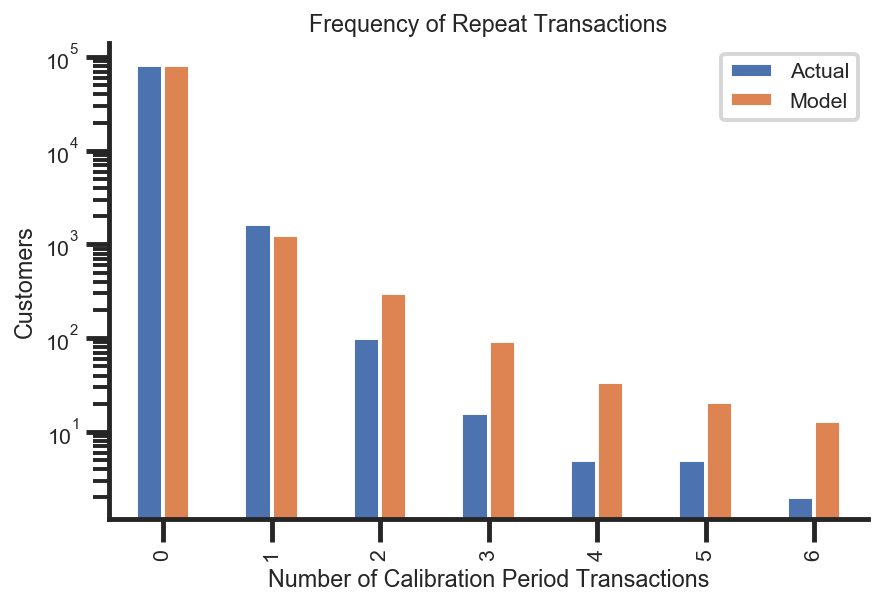

In [99]:
from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(mbgnbd, max_frequency=7)
ax.set_yscale('log')
sns.despine();

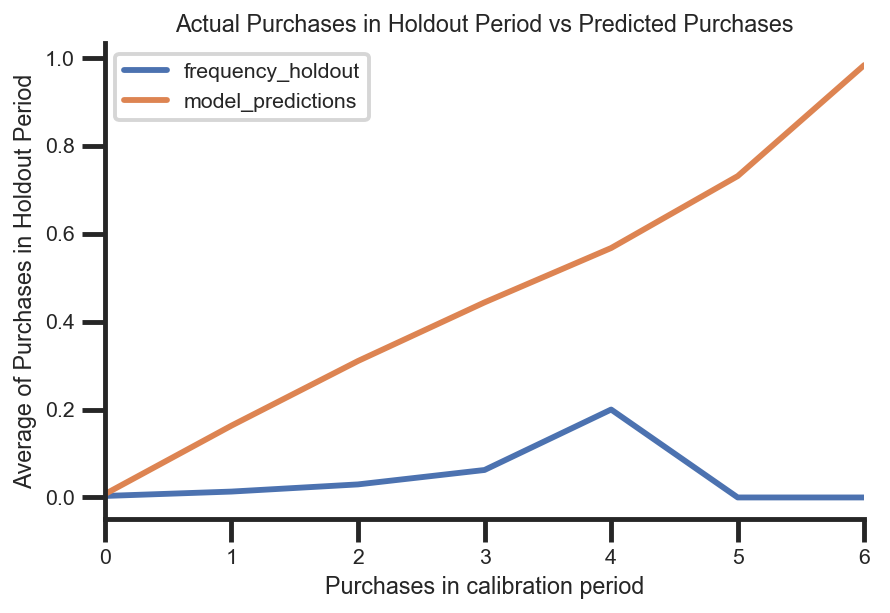

In [100]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(mbgnbd, summary_cal_holdout)
sns.despine();

### Customer Probability History

Probability that customer is alive today is [0.32]


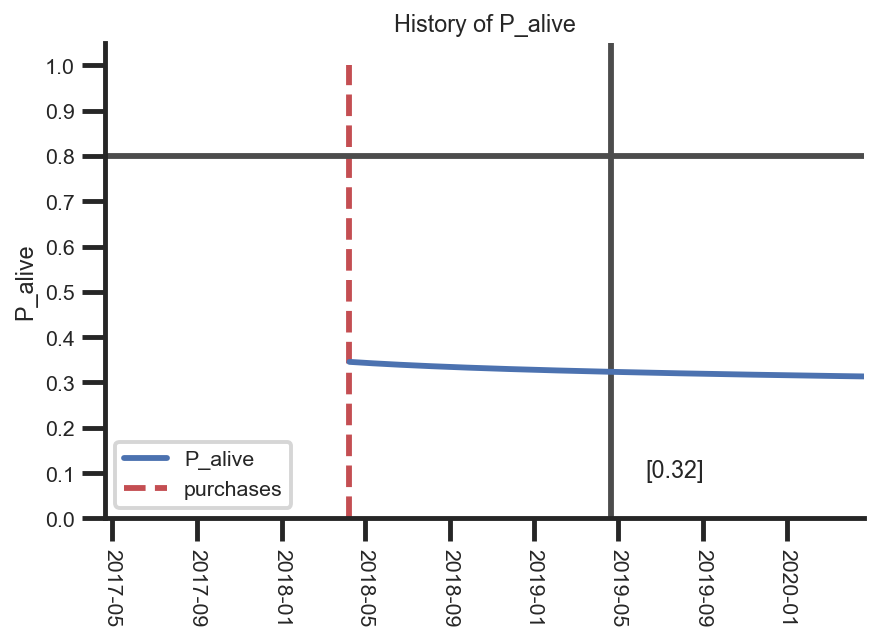

In [101]:
from lifetimes.plotting import plot_history_alive
from datetime import date
from pylab import figure, text, scatter, show

individual = summary_cal_holdout.iloc[4942]

id = individual.name
t = 365*50

today = date.today()
two_year_ago = today.replace(year=today.year - 2)
one_year_from_now = today.replace(year=today.year + 1)

sp_trans = log.loc[log['CUSTOMER_ID'] == id]

from lifetimes.utils import calculate_alive_path

t = (today - sp_trans.ORDER_DATE.min().date()).days
p_alive_today = pd.DataFrame(calculate_alive_path(mbgnbd, sp_trans, 'ORDER_DATE', t, freq='D'))[0].tail(1).values
p_alive_today = np.round(p_alive_today[0], 2)
print('Probability that customer is alive today is', p_alive_today)

t = (one_year_from_now - sp_trans.ORDER_DATE.min().date()).days
ax = plot_history_alive(mbgnbd, t, sp_trans, 'ORDER_DATE', start_date=two_year_ago) #, start_date='2016-01-01'
ax.vlines(x=today, ymin=0, ymax=1.05, colors='#4C4C4C')
ax.hlines(y=0.8, xmin=two_year_ago, xmax=one_year_from_now, colors='#4C4C4C')

ax.set_xlim(two_year_ago, one_year_from_now) # sp_trans.ORDER_DATE.min()
ax.set_ylim(0, 1.05)

plt.xticks(rotation=-90)
text(0.75, 0.1, p_alive_today, ha='center', va='center', transform=ax.transAxes)

sns.despine()

### Predicted Transactions with Time

In [103]:
log.columns = ['CUSTOMER_ID', 'date']

# Get expected and actual repeated cumulative transactions.

from lifetimes.utils import expected_cumulative_transactions

t = (log.date.max() - log.date.min()).days
df = expected_cumulative_transactions(mbgnbd, log, 'date', 'CUSTOMER_ID', t)
df.tail()

,actual,predicted
768,2383,3875.186570
769,2383,3888.104262
770,2383,3901.016511
771,2383,3913.923334
772,2384,3926.824743


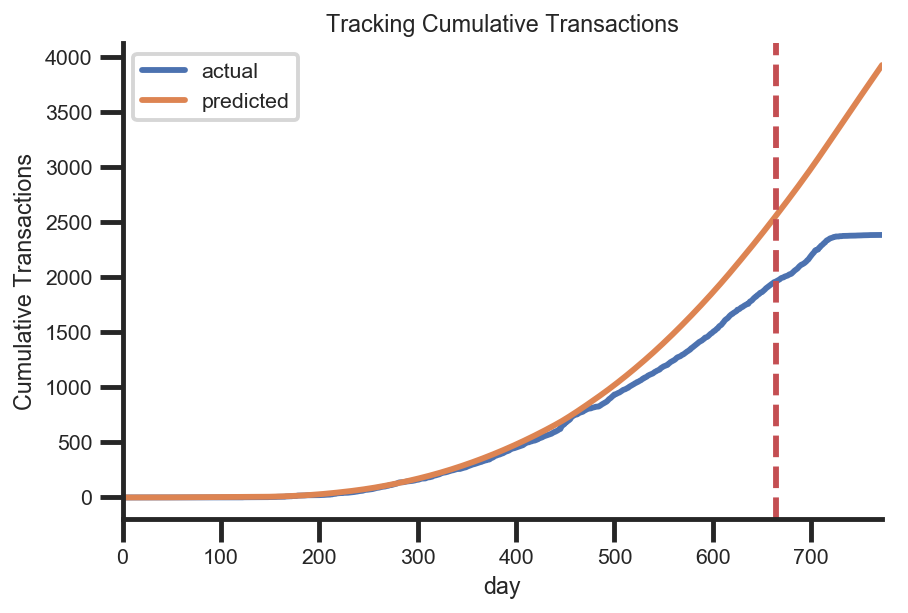

In [105]:
# Calibration period = 2016-09-04 to 2017-09-30
from datetime import datetime

cal = datetime.strptime('2018-06-30', '%Y-%m-%d')

from lifetimes.plotting import plot_cumulative_transactions
t = (log.date.max() - log.date.min()).days
t_cal = (cal - log.date.min()).days
plot_cumulative_transactions(mbgnbd, log, 'date', 'CUSTOMER_ID', t, t_cal, freq='D')
sns.despine()

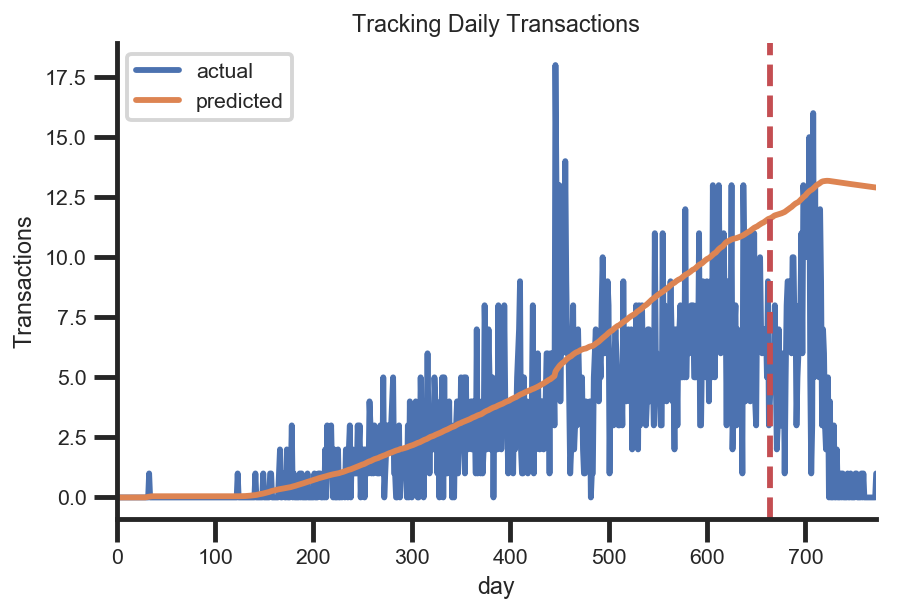

In [107]:
from lifetimes.plotting import plot_incremental_transactions
plot_incremental_transactions(mbgnbd, log, 'date', 'CUSTOMER_ID', t, t_cal, freq='D')
sns.despine()